# DTWとDDTWの比較

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if str(get_ipython()).startswith("<google.colab."):
    !pip install fastdtw
    !pip install dtaidistance

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

from utils import DDTW

np.random.seed(777)

## 実験に使用する二つの波形をプロット

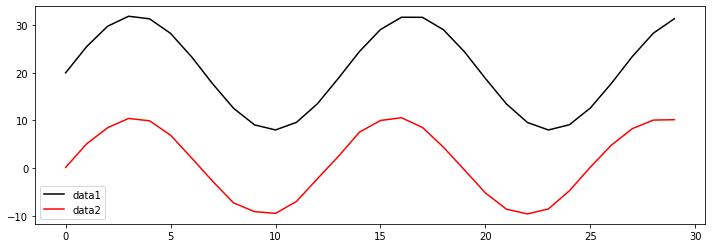

In [3]:
data1 = np.array([12.0 * np.sin(i / 2.1) + 20 for i in range(30)])
data2 = np.array([10.0 * np.sin(i / 2.0) + np.random.rand() for i in range(30)])

plt.figure(figsize=(12, 4))

# 波形をプロット
plt.plot(data1, label="data1", color="k")
plt.plot(data2, label="data2", color="r")
plt.legend()
plt.show()

## DTW

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

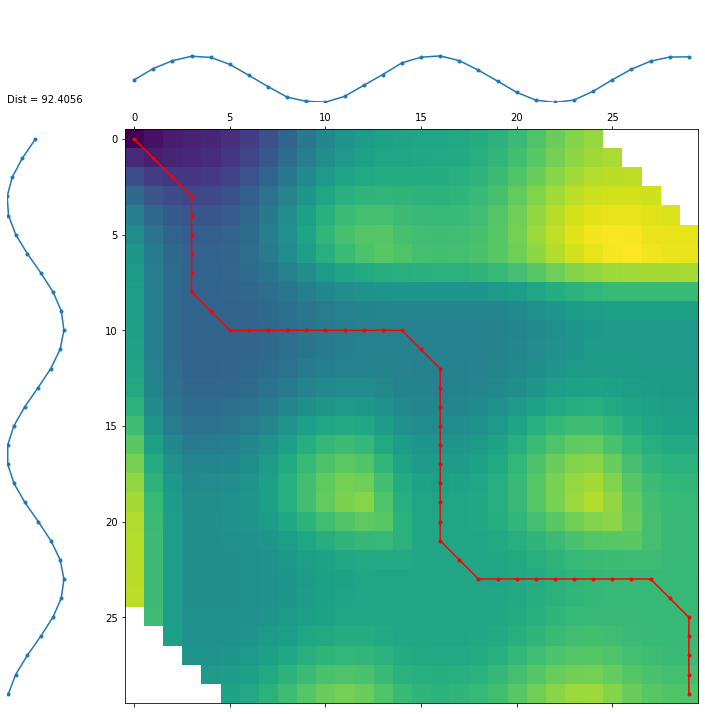

In [4]:
d, paths = dtw.warping_paths(
    data1,
    data2,
    window=25,
)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(data1, data2, paths, best_path)

## DDTW

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


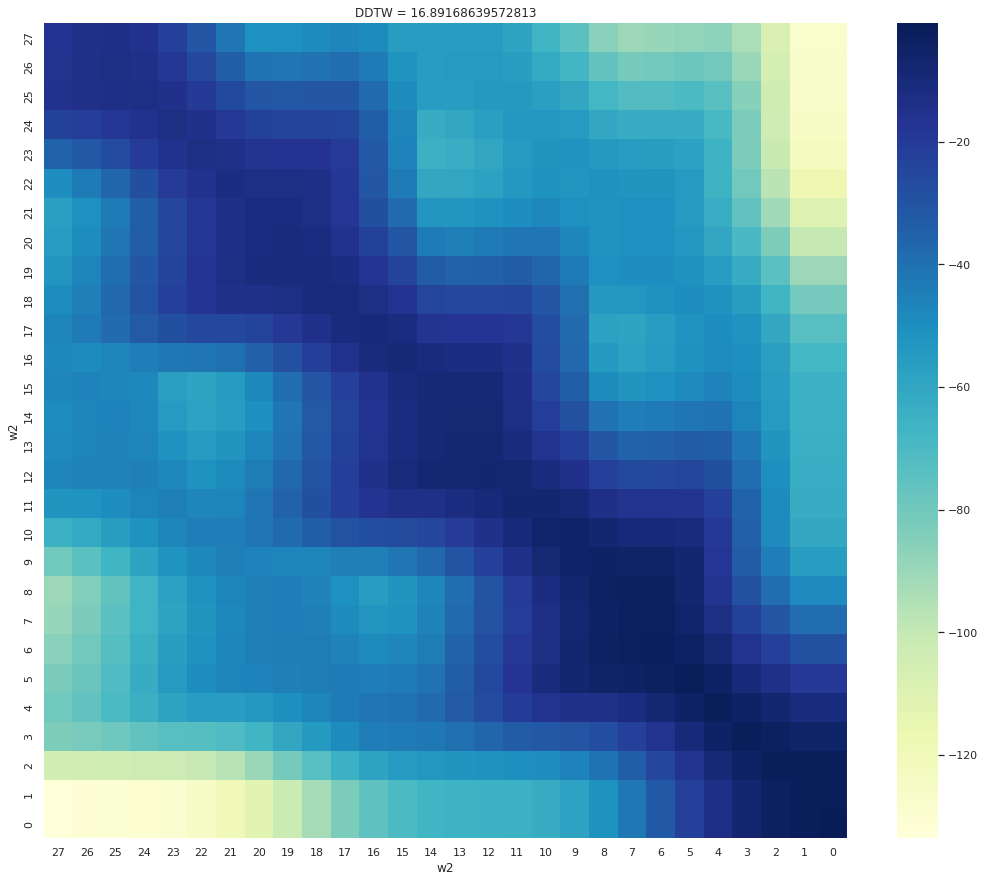

In [5]:
γ_mat, arrows, ddtw = DDTW(np.array(data1), np.array(data2))

sns.set(rc={"figure.figsize": (18, 15)})
sns.set(font="IPAexGothic")
ax = sns.heatmap(-1 * γ_mat, cmap="YlGnBu")
ax.set_title(f"DDTW = {ddtw}")
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel("w2")
ax.set_ylabel("w2")
plt.show()